                                  Open         High          Low        Close  \
Date                                                                            
2022-10-21 00:00:00-04:00  1634.099976  1653.900024  1634.099976  1651.000000   
2022-10-24 00:00:00-04:00  1662.699951  1662.699951  1648.699951  1648.699951   
2022-10-25 00:00:00-04:00  1648.199951  1652.800049  1637.300049  1652.800049   
2022-10-26 00:00:00-04:00  1649.800049  1667.000000  1649.800049  1664.000000   
2022-10-27 00:00:00-04:00  1660.699951  1660.699951  1660.699951  1660.699951   
...                                ...          ...          ...          ...   
2023-10-16 00:00:00-04:00  1910.400024  1921.099976  1910.300049  1921.099976   
2023-10-17 00:00:00-04:00  1914.300049  1925.800049  1914.300049  1922.699951   
2023-10-18 00:00:00-04:00  1935.000000  1957.900024  1935.000000  1955.300049   
2023-10-19 00:00:00-04:00  1950.099976  1977.699951  1945.699951  1968.400024   
2023-10-20 00:00:00-04:00  1

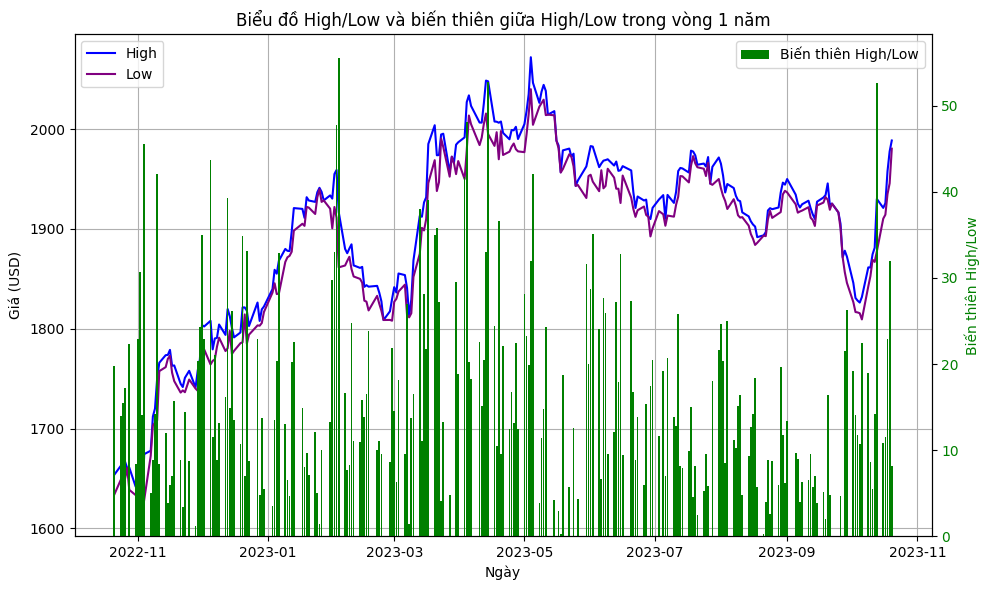

In [11]:
import yfinance as yf 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Lấy dữ liệu lịch sử giá vàng trong 1 năm từ Yahoo Finance 
gold = yf.Ticker('GC=F')
gold_history = gold.history(period='1y')

# Tìm giá trị nhỏ nhất
min_value = gold_history['High'].min()

# Tìm giá trị lớn nhất
max_value = gold_history['High'].max()

# Tính độ lệch chuẩn (standard deviation)
std_deviation = gold_history['High'].std()

# Tính giá trị trung bình
mean_value = gold_history['High'].mean()

# Tính percentiles (25%, 50%, 75%)
percentiles = gold_history['High'].describe(percentiles=[.25, .50, .70])

# Kiểm tra xem có giá trị nào bị thiếu không
gold_history.isnull().sum()
data = gold_history.dropna()
print (data)

# Tạo một subplot với kích thước 10x6
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ giá cao (High) trong dòng thứ nhất (ax1)
ax1.plot(gold_history.index, gold_history['High'], label='High', color='blue')
ax1.plot(gold_history.index, gold_history['Low'], label='Low', color='purple')
ax1.set_xlabel('Ngày')  
ax1.set_ylabel('Giá (USD)')  
ax1.set_title('Biểu đồ High/Low và biến thiên giữa High/Low trong vòng 1 năm') 
ax1.legend(loc='upper left')  
ax1.grid(True)  

# Tạo một trục y thứ hai (ax2) trên cùng của trục y thứ nhất (ax1)
ax2 = ax1.twinx()

# Tính sự khác biệt giữa giá cao và giá thấp
difference = gold_history['High'] - gold_history['Low']

# Vẽ biểu đồ sự khác biệt giữa High và Low trên trục y thứ hai (ax2)
ax2.bar(gold_history.index, difference, label='Biến thiên High/Low', color='green')

ax2.set_ylabel('Biến thiên High/Low', color='green')  
ax2.tick_params(axis='y', labelcolor='green')  
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.show()



R-squared: 0.9880851267221072
Mean Absolute Error: 8.869749699701911
Giá vàng dự đoán:[1973.69189631 1650.70435977 1946.39577895 1937.26391426 2028.08554111
 1961.58227336 1938.15726597 1950.068299   1632.53998593 2030.07071328
 1918.50401301 1939.84461385 1932.6980425  2028.97889282 1935.47733201
 1938.65355901 1943.1201964  1773.98350315 1997.91089987 1765.6457558
 1858.25408607 1772.39538965 1998.7050172  1915.92331342 1927.53664332
 1819.44399435 1888.62719606 1646.33695676 1780.63390263 1872.34876002
 1832.74467213 1798.20262788 1933.59139421 1935.17950771 1756.61324665
 1997.01766932 1789.26935311 1883.56503125 2029.67365461 1848.82451825
 2009.62346415 1916.41960646 1844.06005658 1833.93572697 1964.95709029
 1777.9538475  1824.90321782 1988.87839072 1967.63702425 1791.05605653
 1933.09510117]


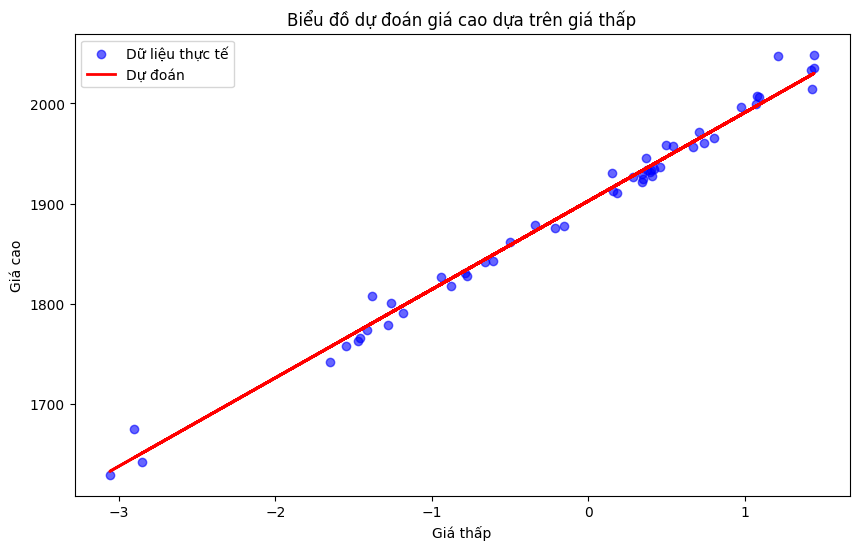

In [12]:
# Xác định các yếu tố độc lập (X) và biến mục tiêu (y)
X = gold_history[['Low']]  # Sử dụng giá thấp làm yếu tố độc lập
y = gold_history['High']   # Dự đoán giá cao

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Tiến hành dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Giá vàng dự đoán:{y_pred}')

# Vẽ đồ thị dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dữ liệu thực tế', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Dự đoán', linewidth=2)
plt.title('Biểu đồ dự đoán giá cao dựa trên giá thấp')
plt.xlabel('Giá thấp')
plt.ylabel('Giá cao')
plt.legend(loc='upper left')
plt.show()
